# Sentiment Analysis Project
For this project, we'll perform the same type of NLTK VADER sentiment analysis, this time on our movie reviews dataset.

The 2,000 record IMDb movie review database is accessible through NLTK directly with
<pre>from nltk.corpus import movie_reviews</pre>

However, since we already have it in a tab-delimited file we'll use that instead.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./moviereviews.tsv', sep='\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


## Clean the data (optional)

In [2]:
df.dropna(inplace=True)

blanks = []

for i,lb,rv in df.itertuples():
    if type(rv) == str:
        if rv.isspace():
            blanks.append(i)
            
df.drop(blanks, inplace=True)

In [3]:
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

## Import `SentimentIntensityAnalyzer` and create an sid object
This assumes that the VADER lexicon has been downloaded.

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

## Use sid to append a `comp_score` to the dataset

In [6]:
df['scores'] = df['review'].apply(lambda rv: sid.polarity_scores(rv))

df['compound'] = df['scores'].apply(lambda d: d['compound'])

df['comp_score'] = df['compound'].apply(lambda s: 'pos' if s >= 0 else 'neg')

df.head()

,label,review,scores,compound,comp_score
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125,neg
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618,neg
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...",0.9951,pos
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...",0.9972,pos
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...",-0.2484,neg


## Perform a comparison analysis between the original `label` and `comp_score`

In [7]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

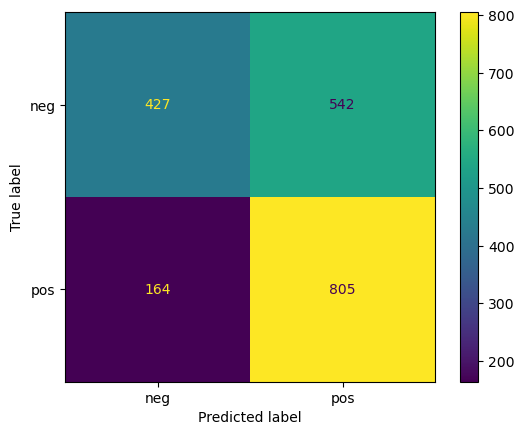

In [9]:
ConfusionMatrixDisplay.from_predictions(df['label'],df['comp_score'])

In [11]:
print(classification_report(df['label'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.72      0.44      0.55       969
         pos       0.60      0.83      0.70       969

    accuracy                           0.64      1938
   macro avg       0.66      0.64      0.62      1938
weighted avg       0.66      0.64      0.62      1938



So, it looks like VADER couldn't judge the movie reviews very accurately. This demonstrates one of the biggest challenges in sentiment analysis - understanding human semantics. Many of the reviews had positive things to say about a movie, reserving final judgement to the last sentence.
